In [1]:
import requests

In [2]:
from bs4 import BeautifulSoup

In [3]:
url = 'https://www.gutenberg.org/cache/epub/58221/pg58221-images.html'

In [4]:
contenido = requests.get(url).text

In [5]:
soup = BeautifulSoup(contenido, "html.parser")

In [ ]:
titulo = soup.h1

In [ ]:
print(titulo.text)

LA ODISEA


In [ ]:
italicas = soup.find_all('i')

In [ ]:
print(italicas)

[<i>Ilíada</i>, <i>Odisea</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>in medias res, non secus
ac notas, auditorem rapit</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>De
lo sublime</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>Odisea</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>Ilíada</i>, <i>Odisea</i>, <i>folk-lore</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>Odisea</i>, <i>la sacra potestad
de Alcínoo</i>, <i>Ilíada</i>, <i>bracinívea</i>, <i>ojilúcida</i>, <i>argentípeda</i>, <i>Teogonía</i>, <i>Ilíada</i>, <i>Bibliotheca scriptorum Graecorum et
Romanorum Teubneriana</i>, <i>Lexicon Homericum</i>, <i>Diccionario de
Autoridades</i>, <i>Ilíada</i>, <i>Odisea</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>Odisea</i>, <i>Odisea</i>, <i>Odisea</i>, <i>Viaje de Telémaco</i>, <i>Regreso de Ulises</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>Ilíada</i>, <i>Odisea</i>, <i>Odisea</i>, <i>Hermosilla y su Ilíada</i>, <i>y si no sé el griego</i>, <i>el griego de Homero, que no es una lengua general, sino
una de sus cuatro distintos dialectos, na

In [ ]:
from collections import Counter

In [ ]:
parrafos = str(soup.find_all('p'))

In [ ]:
print(parrafos.count('Ulises'))

1662


In [ ]:
print(parrafos.count('Troya'))
print(parrafos.count('mar'))
print(parrafos.count('Sirena'))
print(parrafos.count('dioses'))

98
541
21
300


In [ ]:
#Funcion para buscar palabras
def buscar_palabra(palabra):
  ocurrencias = str(soup).lower().count(palabra.lower())
  print(f"Encontraste la palabra '{palabra}'' {ocurrencias} 'veces")

In [ ]:
buscar_palabra('Dioses')

Encontraste la palabra 'Dioses'' 302 'veces


In [ ]:
import random

In [ ]:
parrafo = (soup.find_all('p'))
parrafo_aleatorio = random.choice(parrafo).text.strip()

In [ ]:
print(parrafo_aleatorio)

560 Respondióle el paciente
divinal Ulises: «¡Eumeo! Yo diría incontinenti la verdad de todas
estas cosas á la hija de Icario, á la discreta Penélope, porque sé
muy bien de su esposo y hemos sufrido igual infortunio; mas temo á la
muchedumbre de los crueles pretendientes, cuya insolencia y orgullo
llegan al férreo cielo. Ahora mismo, mientras andaba yo por la casa
sin hacer mal á nadie, dióme este varón un doloroso golpe y no lo
impidió Telémaco ni otro alguno. Así pues, exhorta á Penélope, aunque
esté impaciente, á que aguarde en el palacio hasta la puesta del
sol; é interrógueme entonces sobre su marido y el día que volverá,
haciéndome sentar cerca del fuego, pues mis vestidos están en mísero
estado como sabes tú muy bien por haber sido el primero á quien
dirigí mis súplicas.»


In [ ]:
print(len(parrafo_aleatorio.split()))

138


# WordCloud

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image # modulo para trabajar con imagenes
import nltk
import nltk
import nltk
import matplotlib.pyplot as plt

In [ ]:
# Descarga corpus de stopwords en español
nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Funcion para limpiar texto
def limpiar_texto(texto):
  texto_minuscula =  texto.lower()
  texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minuscula)
  lista_palabras = texto_sin_puntuacion.split()
  palabras_importantes = []

  for palabra in lista_palabras:
    if palabra not in stopwords_es:
      palabras_importantes.append(palabra)

  return palabras_importantes

In [ ]:
texto_completo = soup.get_text()

palabras_limpias = limpiar_texto(texto_completo)

texto_limpio = ' '.join(palabras_limpias)


In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='gray').generate(texto_limpio)

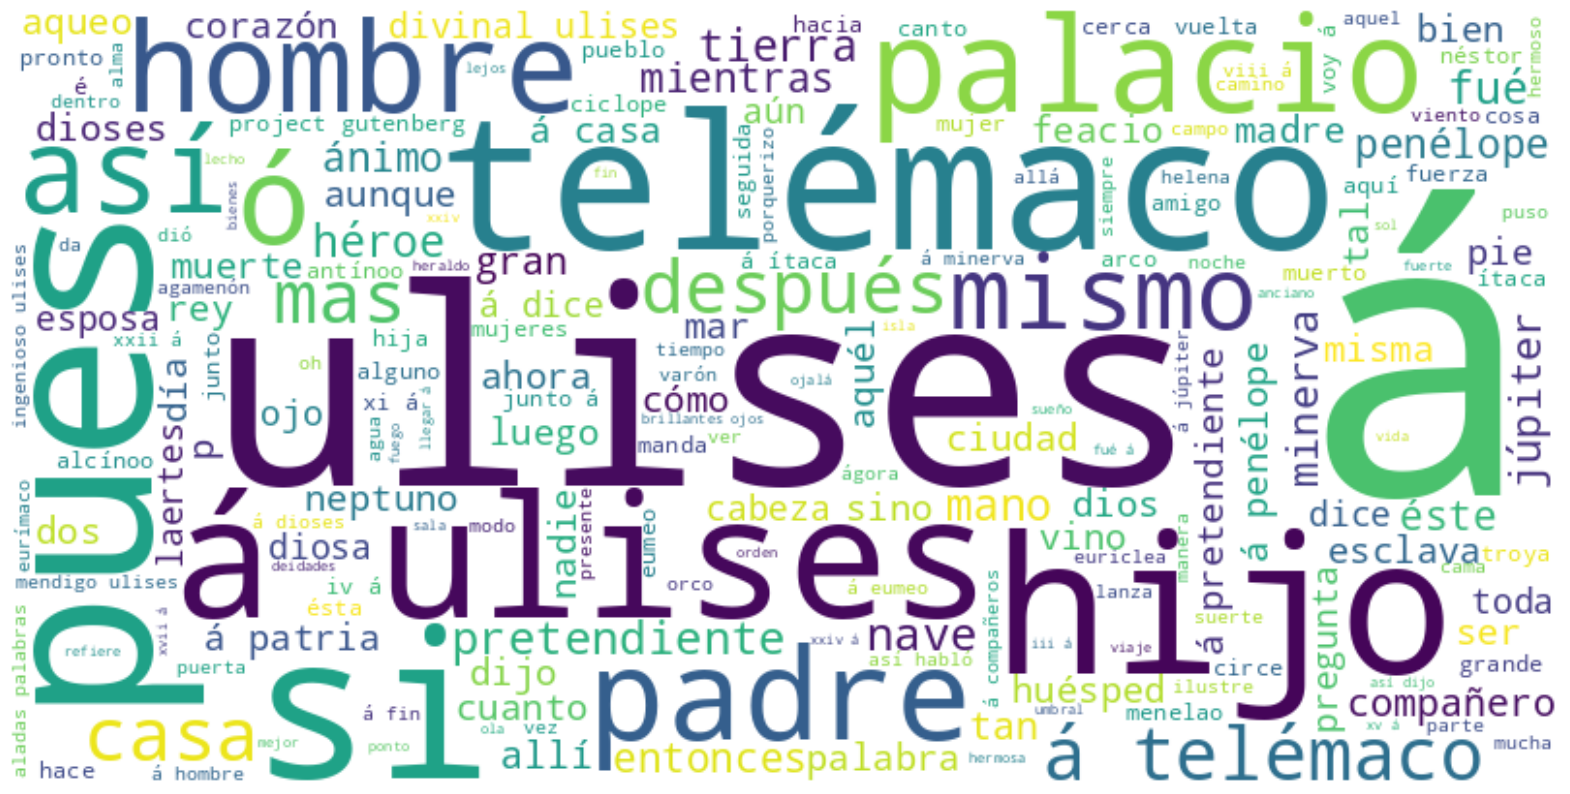

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_limpio)
plt.figure(figsize=(20, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Funcion para limpiar texto
def limpiar_texto(texto):

  # Lista de palabras a eliminar
  palabras_a_eliminar = ['dijo', 'así', 'aunque', 'sino', 'luego', 'pues', 'mientras',
        'después', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'cap',
        'capítulo', 'verso', 'canto', 'á', 'si', 'ó']


  # Añade las palabras que quiero eliminar a las stopwords
  black_list = stopwords_es.union(palabras_a_eliminar)
  texto_minuscula = texto.lower() # convierte todo el texto en minusculas

  texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minuscula)

  lista_palabras = texto_sin_puntuacion.split()

  palabras_importantes = []

  for palabra in lista_palabras:
    if palabra not in black_list:
      palabras_importantes.append(palabra)

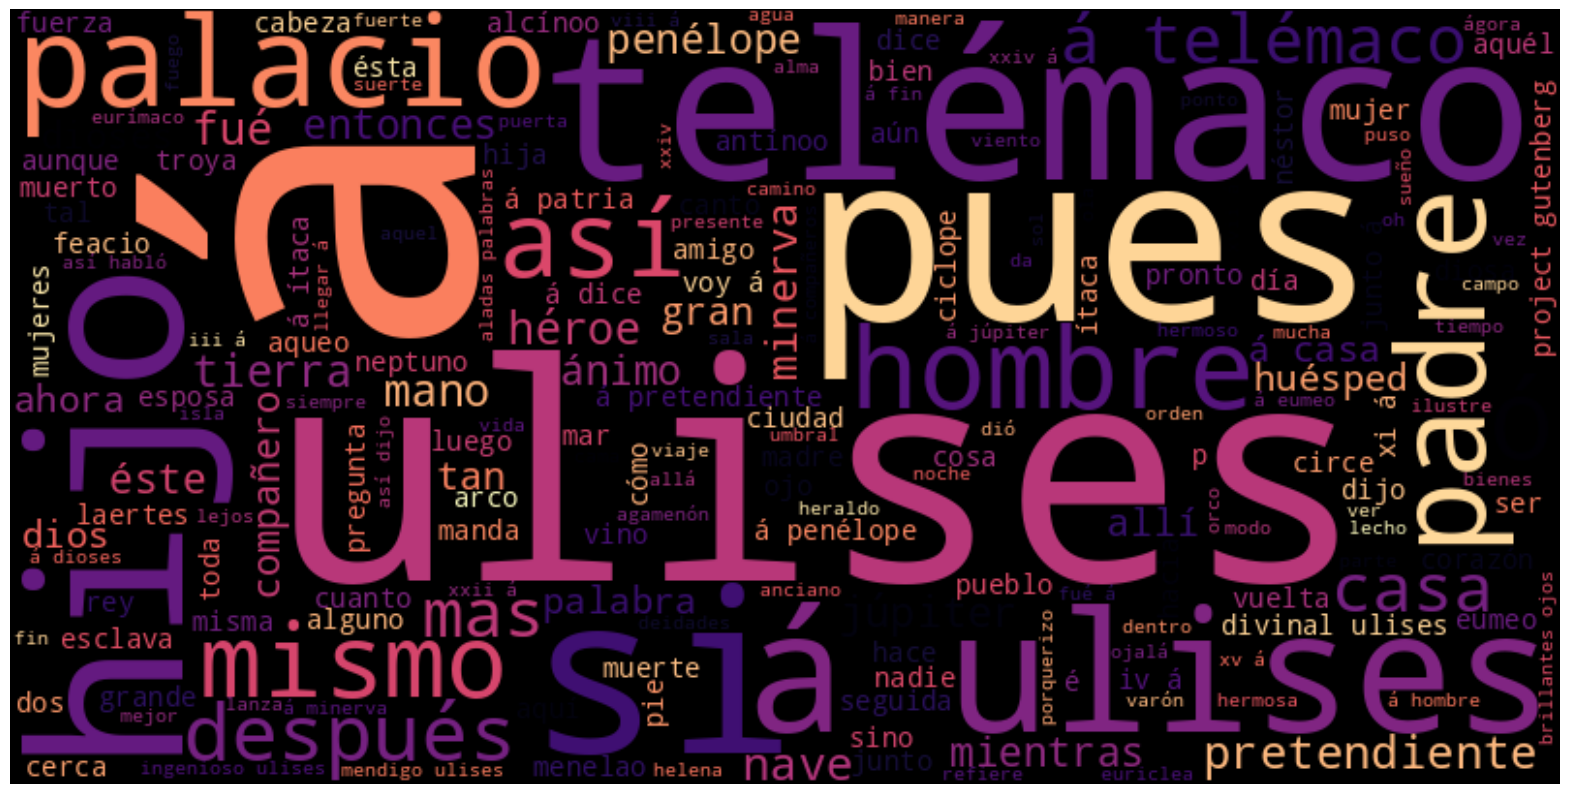

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap = "magma").generate(texto_limpio)
plt.figure(figsize=(20, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
